In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import gc
import re
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re  # Importa o módulo de expressões regulares
from tqdm import tqdm

cmap = plt.get_cmap('inferno')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cmap(np.linspace(0, 1, 12)))
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+', 'H', 'h']

#### config dream
plt.rcParams['text.usetex'] = True
#plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20) ##tamanho do label
plt.rc('lines', markersize=6)
plt.rc('lines', linewidth=2)
plt.rc('legend', loc='best')
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=13) ##tamanho dos numeros nos eixos
plt.rc('ytick', labelsize=13)
plt.rc('font', family='serif')


/tmp/ipykernel_39794/3300369813.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re  # Importa o módulo de expressões regulares

# Caminho para a pasta que contém os arquivos, ajuste para sua necessidade
caminho_pasta = '/home/robert/Datas/Collagen_fibril_zurik_ext/*.dat'

# Lista de chaves para o dicionário principal
chaves = [2, 8, 16, 32, 64, 128, 512, 1024, 4096, 8192, 10000]
Dicts = {chave: {} for chave in chaves}

# Listar todos os arquivos .dat na pasta especificada
arquivos = glob.glob(caminho_pasta)

# Expressão regular para encontrar o valor de 'ts'
regex_ts = re.compile(r'ts_(\d+)')

# Processar cada arquivo
for file_path in tqdm(arquivos):
    # Usar a expressão regular para encontrar o valor de 'ts'
    match_ts = regex_ts.search(file_path)
    if match_ts:
        ts = int(match_ts.group(1))  # Converte o valor capturado para inteiro

        # Verificar se o valor de 'ts' está em 'chaves'
        if ts in Dicts:
            dic_for_ts = Dicts[ts]
        else:
            continue  # Se 'ts' não estiver nas chaves, pule para o próximo arquivo

        # Ler o arquivo e processar o DataFrame
        df = pd.read_csv(file_path, sep=' ')
        df.columns = ['i', 'uid', 'x', 'y', 'z']

        # Contagem por camada
        contagem_por_camada = df.groupby('y').size()
        num_part = contagem_por_camada.values
        layer = contagem_por_camada.index.tolist()

        # Atualizar o dicionário 'Dicts'
        for i, count in zip(layer, num_part):
            if i in dic_for_ts:
                dic_for_ts[i].append(count)
            else:
                dic_for_ts[i] = [count]

# Neste ponto, 'Dicts' foi atualizado com os dados de todos os arquivos


  0%|          | 0/549 [00:00<?, ?it/s]

  5%|▌         | 29/549 [00:07<02:15,  3.84it/s]


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [53]:
Dicts_mean = {}
for ts, camadas_ts in Dicts.items():  # Usando .items() para iterar sobre pares chave-valor
    # Calculando a média de partículas para cada camada e arredondando para o inteiro mais próximo
    layers = list(camadas_ts.keys())
    num_parts_mean = [round(sum(particulas) / len(particulas), 0) for particulas in camadas_ts.values()]

    Dicts_mean[ts] = [layers, num_parts_mean]


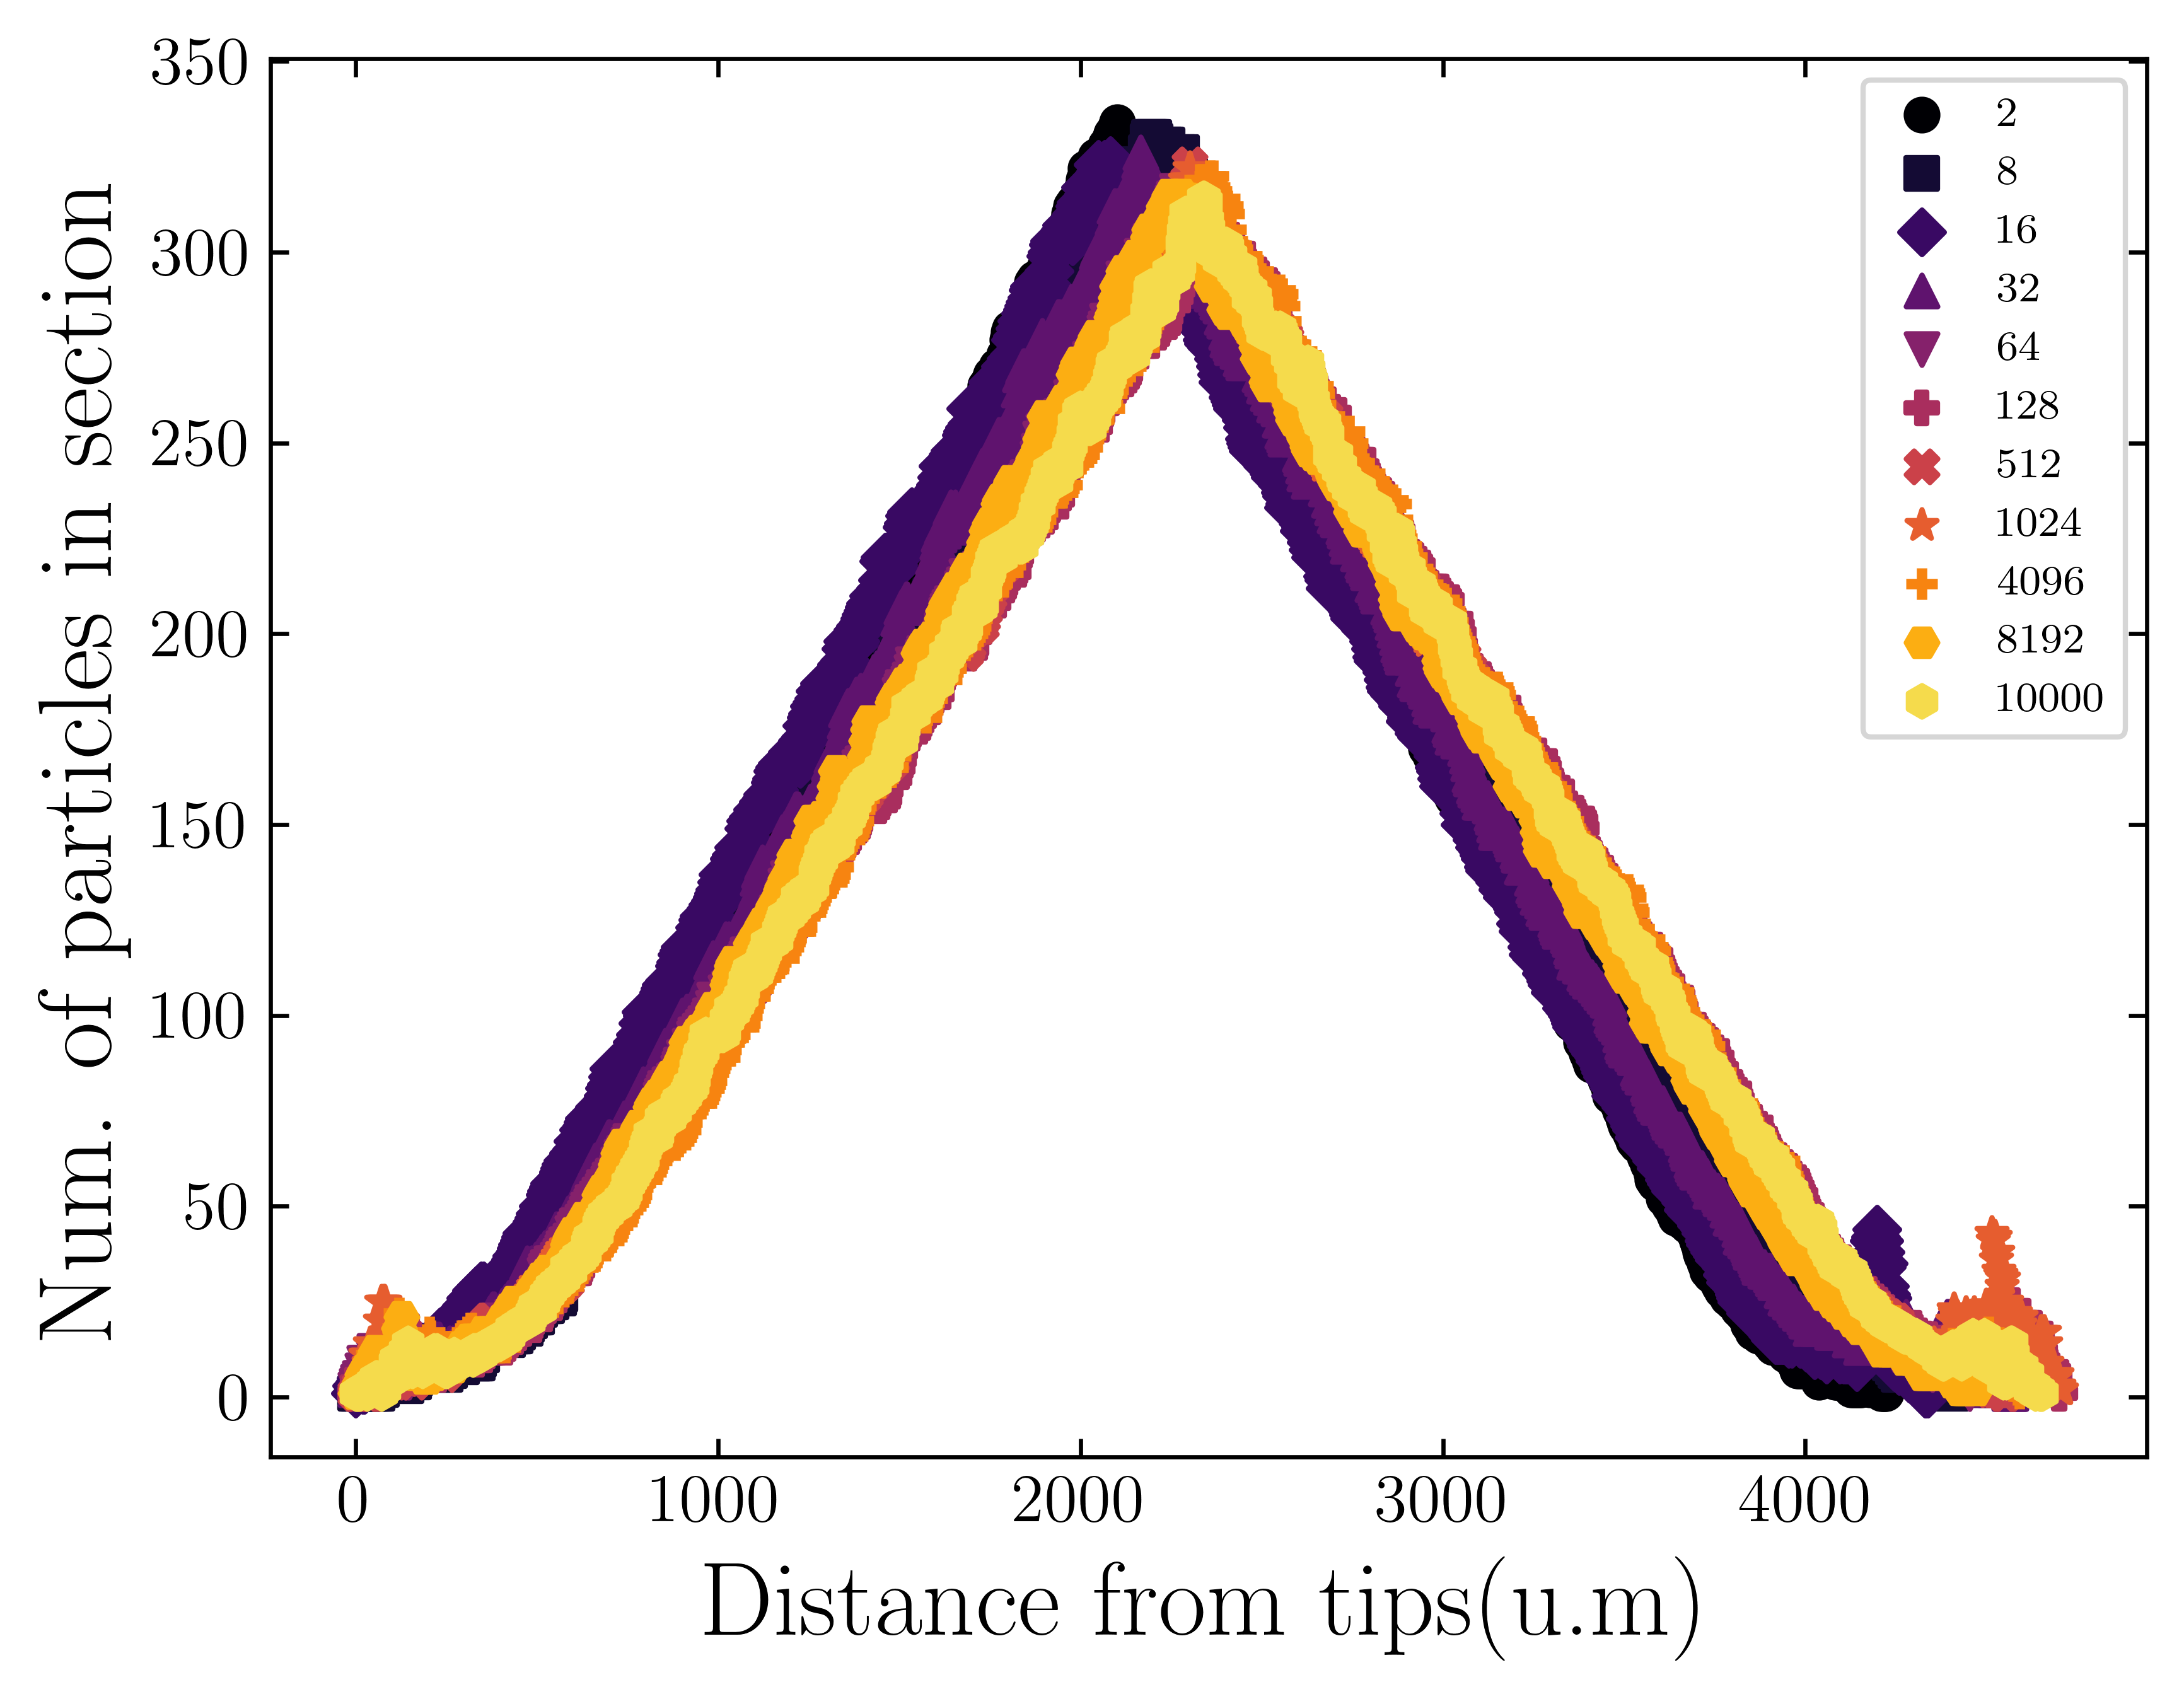

In [105]:
import matplotlib.pyplot as plt

# Criando um gráfico de dispersão para cada ts
plt.figure(dpi = 600)  # Define o tamanho da figura
# Iterando sobre cada valor de ts no dicionário Dicts_mean
i = 0
for ts, data in Dicts_mean.items():

   
        layers, num_parts_mean = data  # Desempacotando os dados
            # Determinando o passo para selecionar uma centena de camadas
        step = max(1, len(layers) // 1000)  # Garante um passo mínimo de 1

        # Selecionando um subconjunto de camadas e suas médias correspondentes
        selected_layers = layers[::step]
        selected_means = num_parts_mean[::step]
        

        plt.scatter(selected_layers - min(selected_layers)*np.ones(len(selected_layers)), selected_means, marker = markers[i], label=f'{ts}') 
        i+=1 # Cria um gráfico de dispersão

plt.tick_params(direction='in', top=True, right=True, labeltop=False, labelright=False)
plt.xlabel("Distance from tips(u.m)" )
plt.ylabel("Num. of particles in section" )
plt.legend()
plt.show()

In [3]:
# Caminho para a pasta que contém os arquivos, ajuste para sua necessidade
caminho_pasta = '/home/robert/Datas/Collagen_fibril_zurik_ext/*.dat'

# Listar todos os arquivos .dat na pasta especificada
arquivos = glob.glob(caminho_pasta)

# Expressão regular para encontrar o valor de 'ts'
regex_ts = re.compile(r'ts_(\d+)')

DF = {}

# Processar cada arquivo
for file_path in tqdm(arquivos):
    # Usar a expressão regular para encontrar o valor de 'ts'
    match_ts = regex_ts.search(file_path)
    if match_ts:
        ts = int(match_ts.group(1))  # Converte o valor capturado para inteiroão estiver nas chaves, pule para o próximo arquivo

        # Ler o arquivo e processar o DataFrame
        df = pd.read_csv(file_path, sep=' ')
        df.columns = ['i', 'uid', 'x', 'y', 'z']

        if ts in DF.keys():
            DF[ts].append(df)
        else:
            DF[ts] = [df]

length = {}
for ts in sorted(DF.keys()):
    for df in DF[ts]:
        l = df['y'].max() - df['y'].min()
        
        if ts in length.keys():
            length[ts].append(l)
        else:
            length[ts] = [l]

100%|██████████| 549/549 [03:18<00:00,  2.77it/s]


In [ ]:
length

{2: [3829,
  3761,
  3945,
  3665,
  3441,
  3517,
  3537,
  3985,
  3697,
  3729,
  3637,
  3525,
  3601,
  3341,
  3397,
  3561,
  3729,
  3641,
  3537,
  3573,
  3645,
  3617,
  3473,
  3797,
  3341,
  3765,
  3885,
  3609,
  3633,
  3841,
  3737,
  3801,
  3689,
  3833,
  3769,
  3761,
  3821,
  3601,
  3945,
  3569,
  3565,
  3581,
  3873,
  3697,
  3689,
  3629,
  3701,
  3561,
  3541,
  3801],
 8: [3733,
  3685,
  3589,
  3737,
  3737,
  3729,
  3589,
  3897,
  3669,
  3673,
  3713,
  3765,
  3737,
  3577,
  3597,
  3709,
  3881,
  3849,
  3645,
  3541,
  3649,
  3865,
  3689,
  3753,
  3873,
  3581,
  3585,
  3457,
  3757,
  3569,
  3909,
  3773,
  3561,
  3653,
  3821,
  3565,
  3913,
  3629,
  3733,
  3869,
  3537,
  3761,
  3621,
  3573,
  3537,
  3557,
  3673,
  3577,
  3745,
  3921],
 16: [3613,
  3605,
  3809,
  3969,
  3773,
  3981,
  3693,
  3665,
  3733,
  3941,
  3693,
  3805,
  3753,
  3693,
  3761,
  3689,
  3701,
  3857,
  3713,
  3757,
  3913,
  3905,
  3689,
  38

In [17]:
type(length[2])

list

Text(0.5, 0, '$T_{s}$')

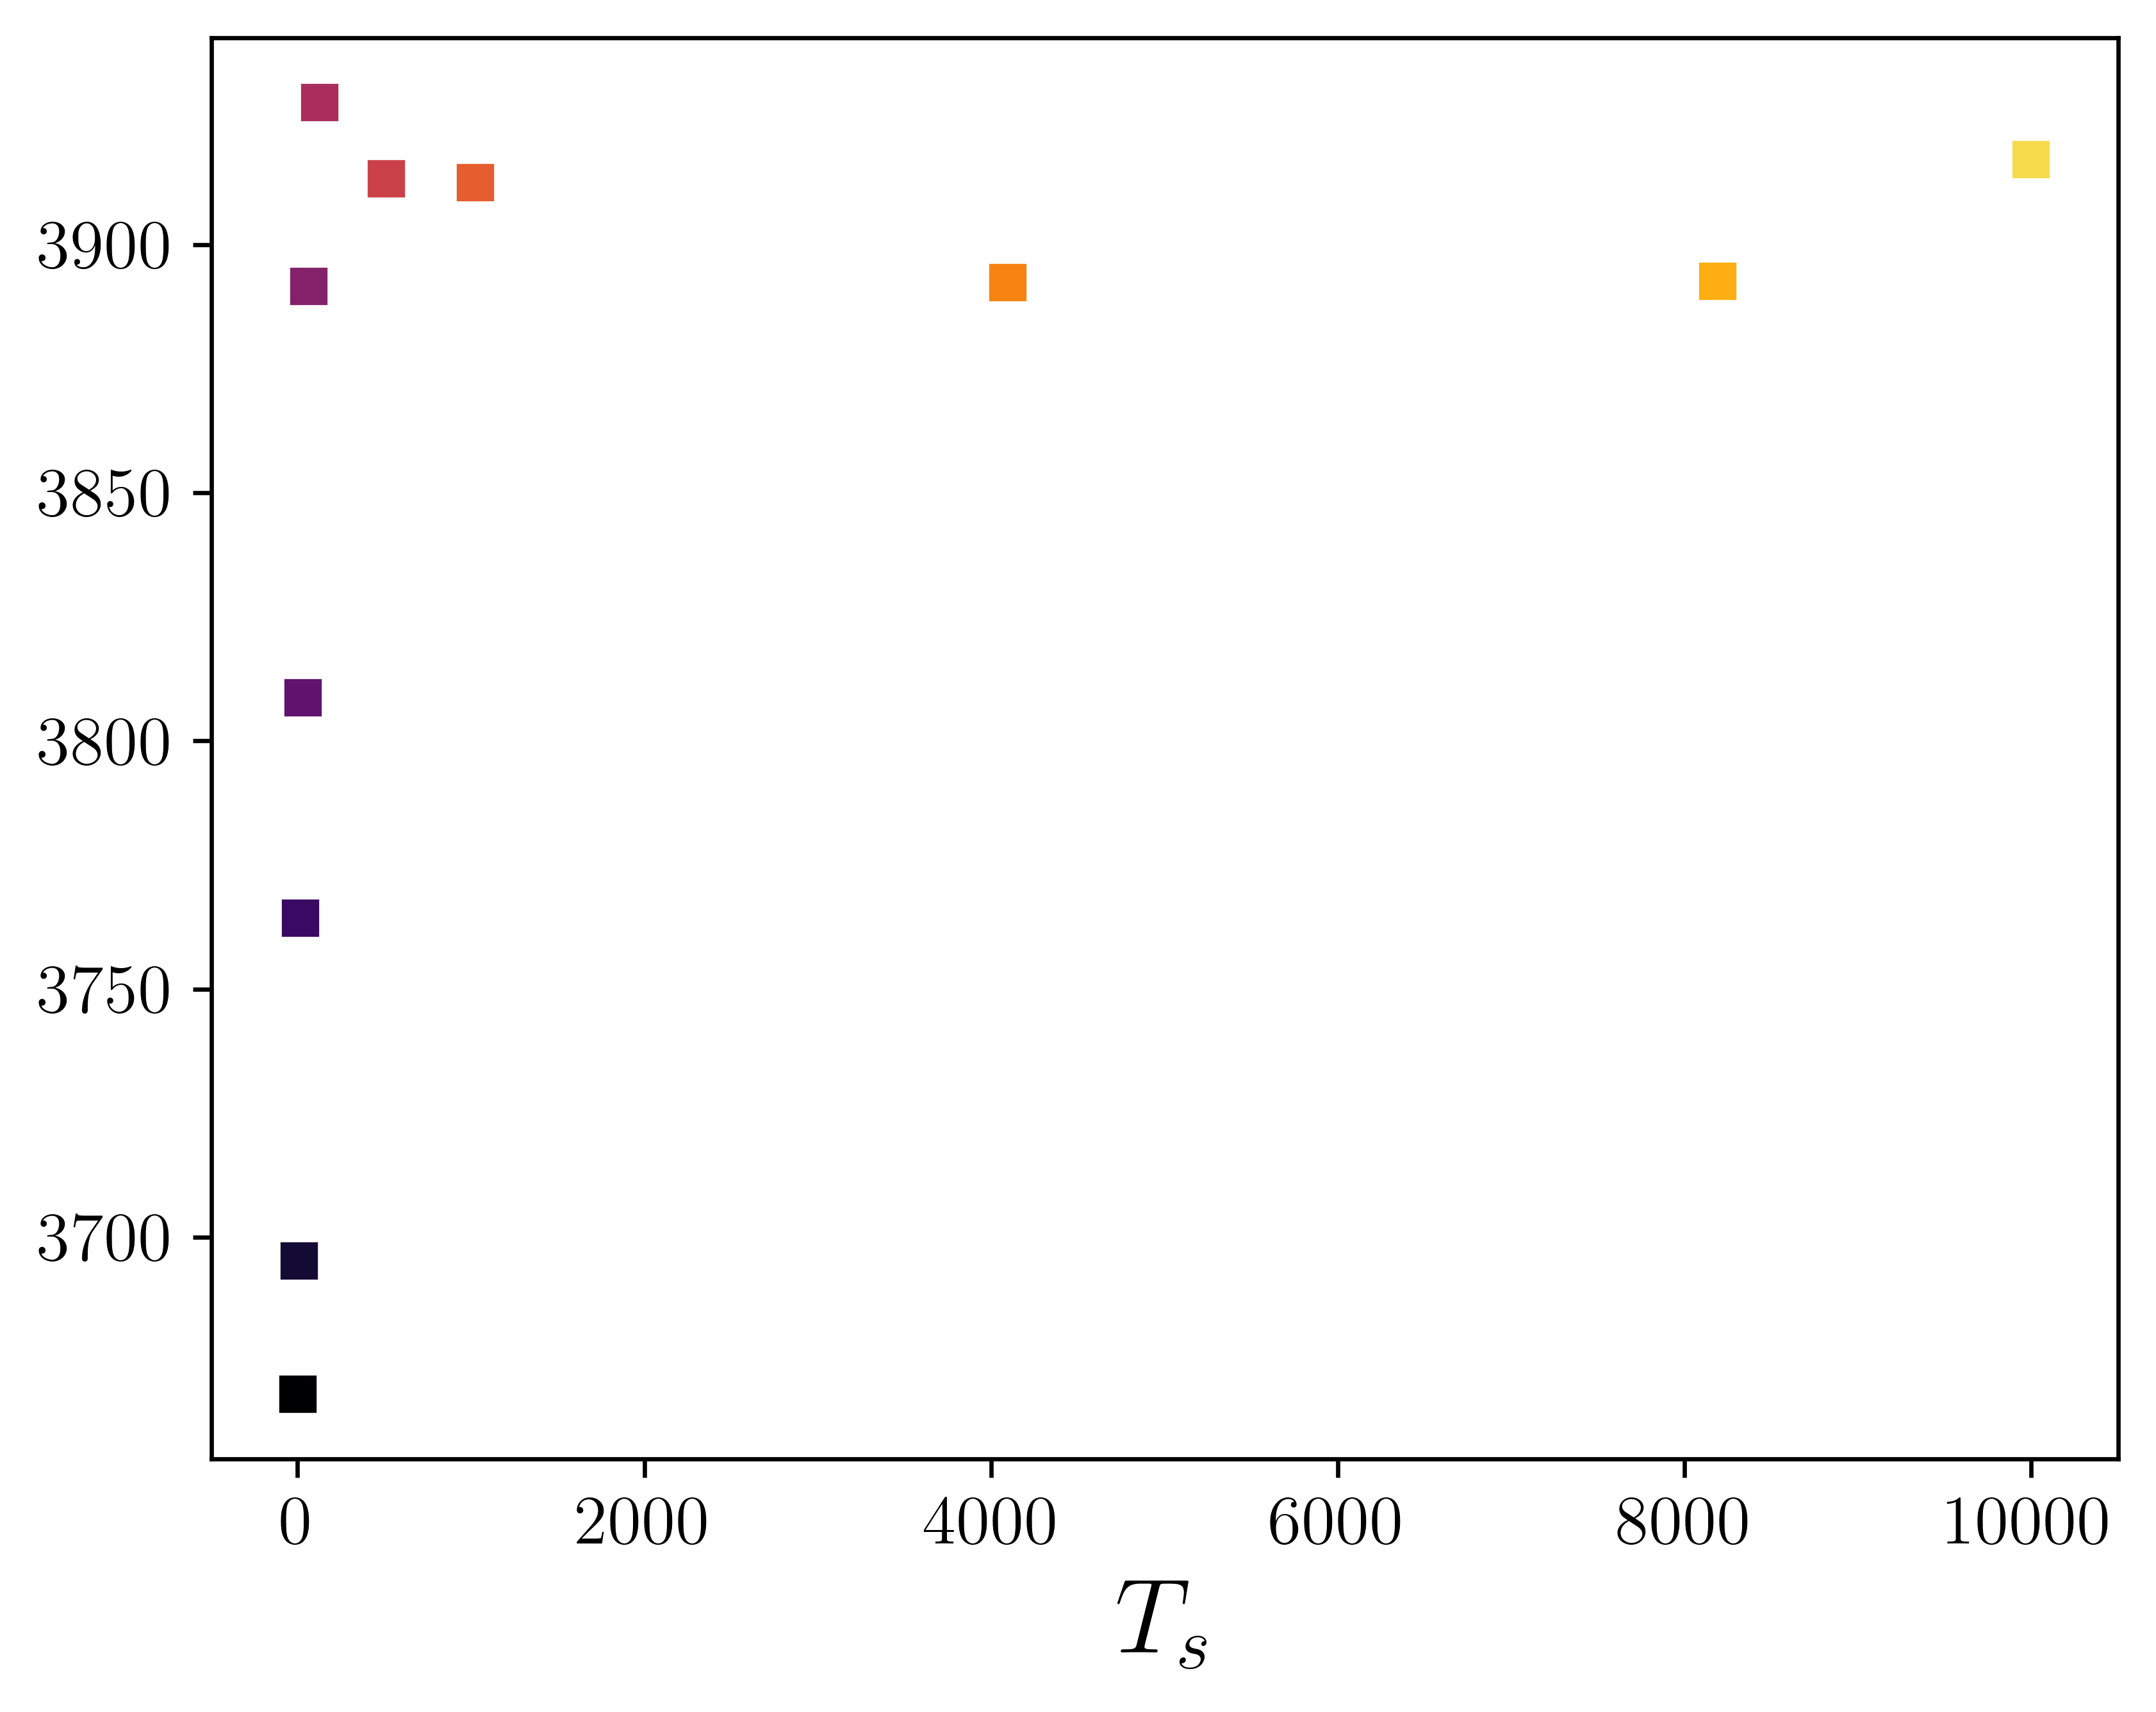

In [4]:
i = 0
plt.figure(dpi = 600)
ts = []
ml = []
for key, l in length.items():
    media=sum(l) / len(l) if len(l) > 0 else 0
    ts.append(key)
    ml.append(media)
    plt.plot(key,media,'s--')
    i+=1

plt.xlabel(r'$T_{s}$')

In [ ]:
ml


[3668.36,
 3695.16,
 3764.265306122449,
 3808.68,
 3891.56,
 3928.6,
 3913.24,
 3912.52,
 3892.28,
 3892.52,
 3917.16]

In [ ]:
L = [3668, 3695, 3764, 3808, 3891, 3928, 3913, 3912, 3892, 3892, 3917]

In [5]:
x = np.array(ts)
y = np.array(ml)

In [7]:
np.mean(ml[6:11])

3905.5440000000003

In [6]:
x1 = np.linspace(-150, 10150,len(x))
y1 = np.ones(len(x1))*np.mean(ml[6:11])


Text(0, 0.5, 'T_{s}')

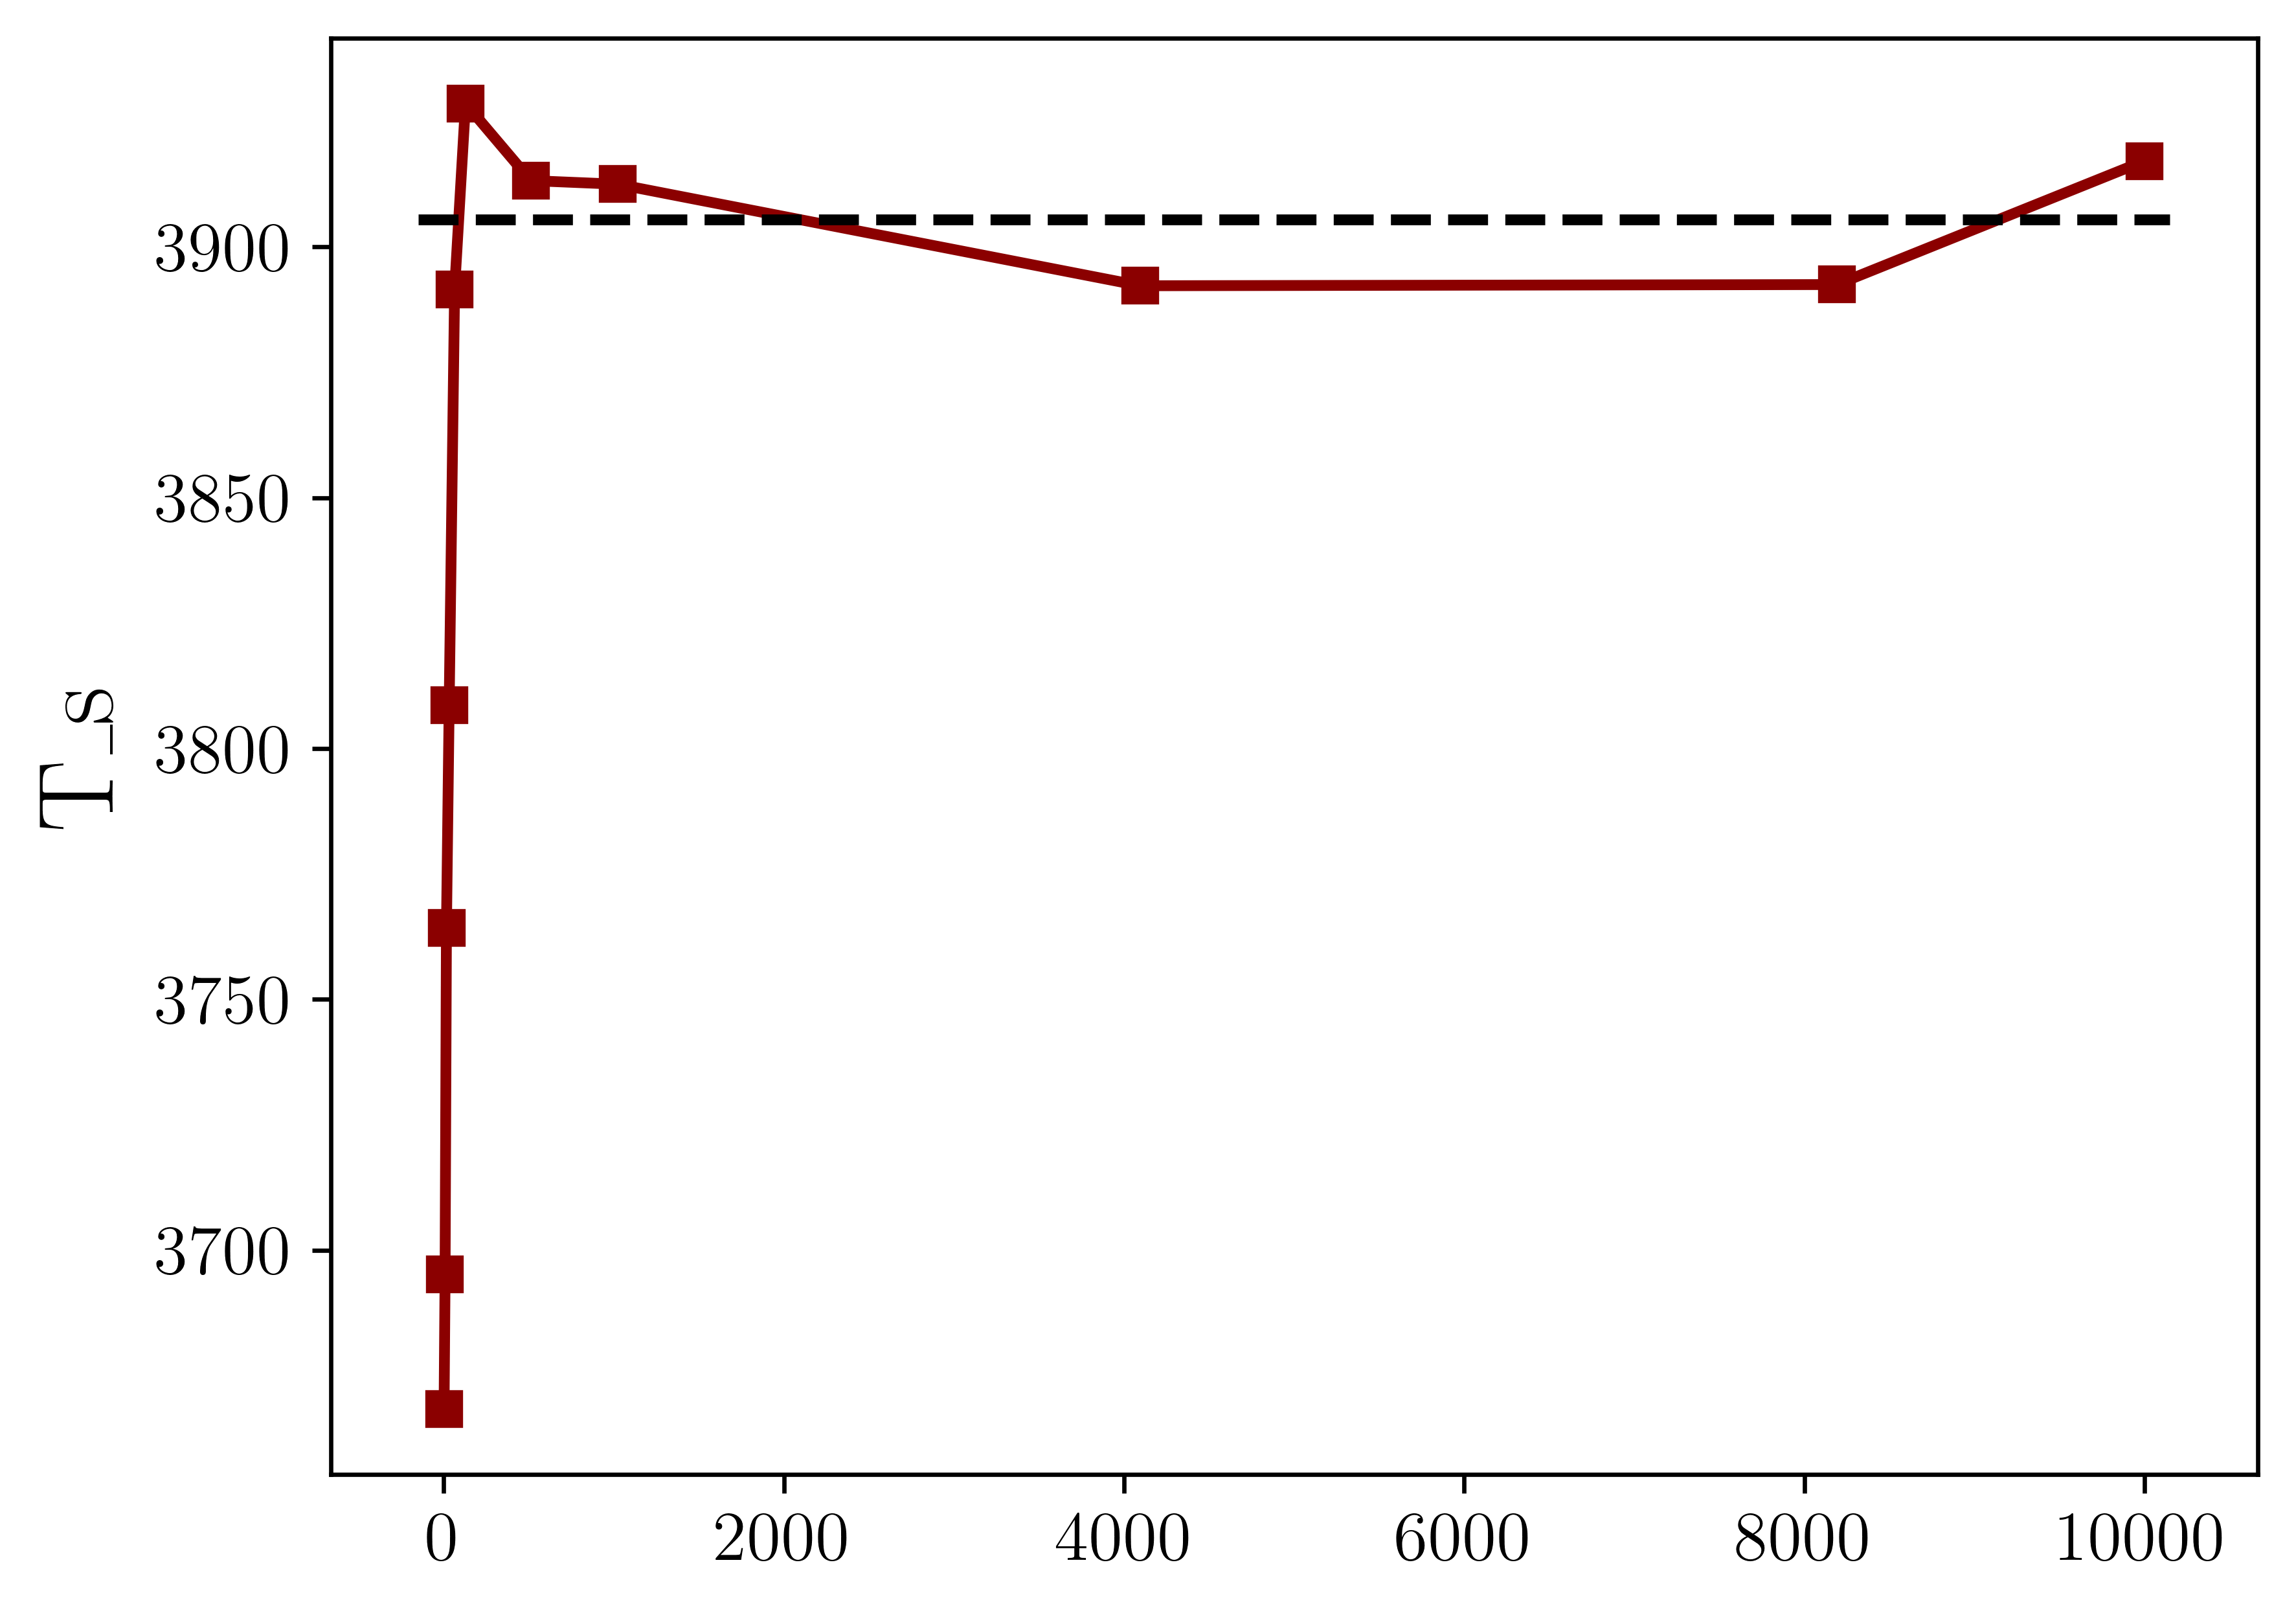

In [18]:
plt.figure(dpi = 600)
plt.plot(x,y,'s-', color = 'darkred')
plt.plot(x1,y1,'--k')
plt.ylabel(r'T_{s}')

In [14]:
y1[0]

3905.5440000000003

In [15]:
(14.07+14.14+14.06+14.16+13.95)/5

14.076000000000002

(3650.0, 3950.0)

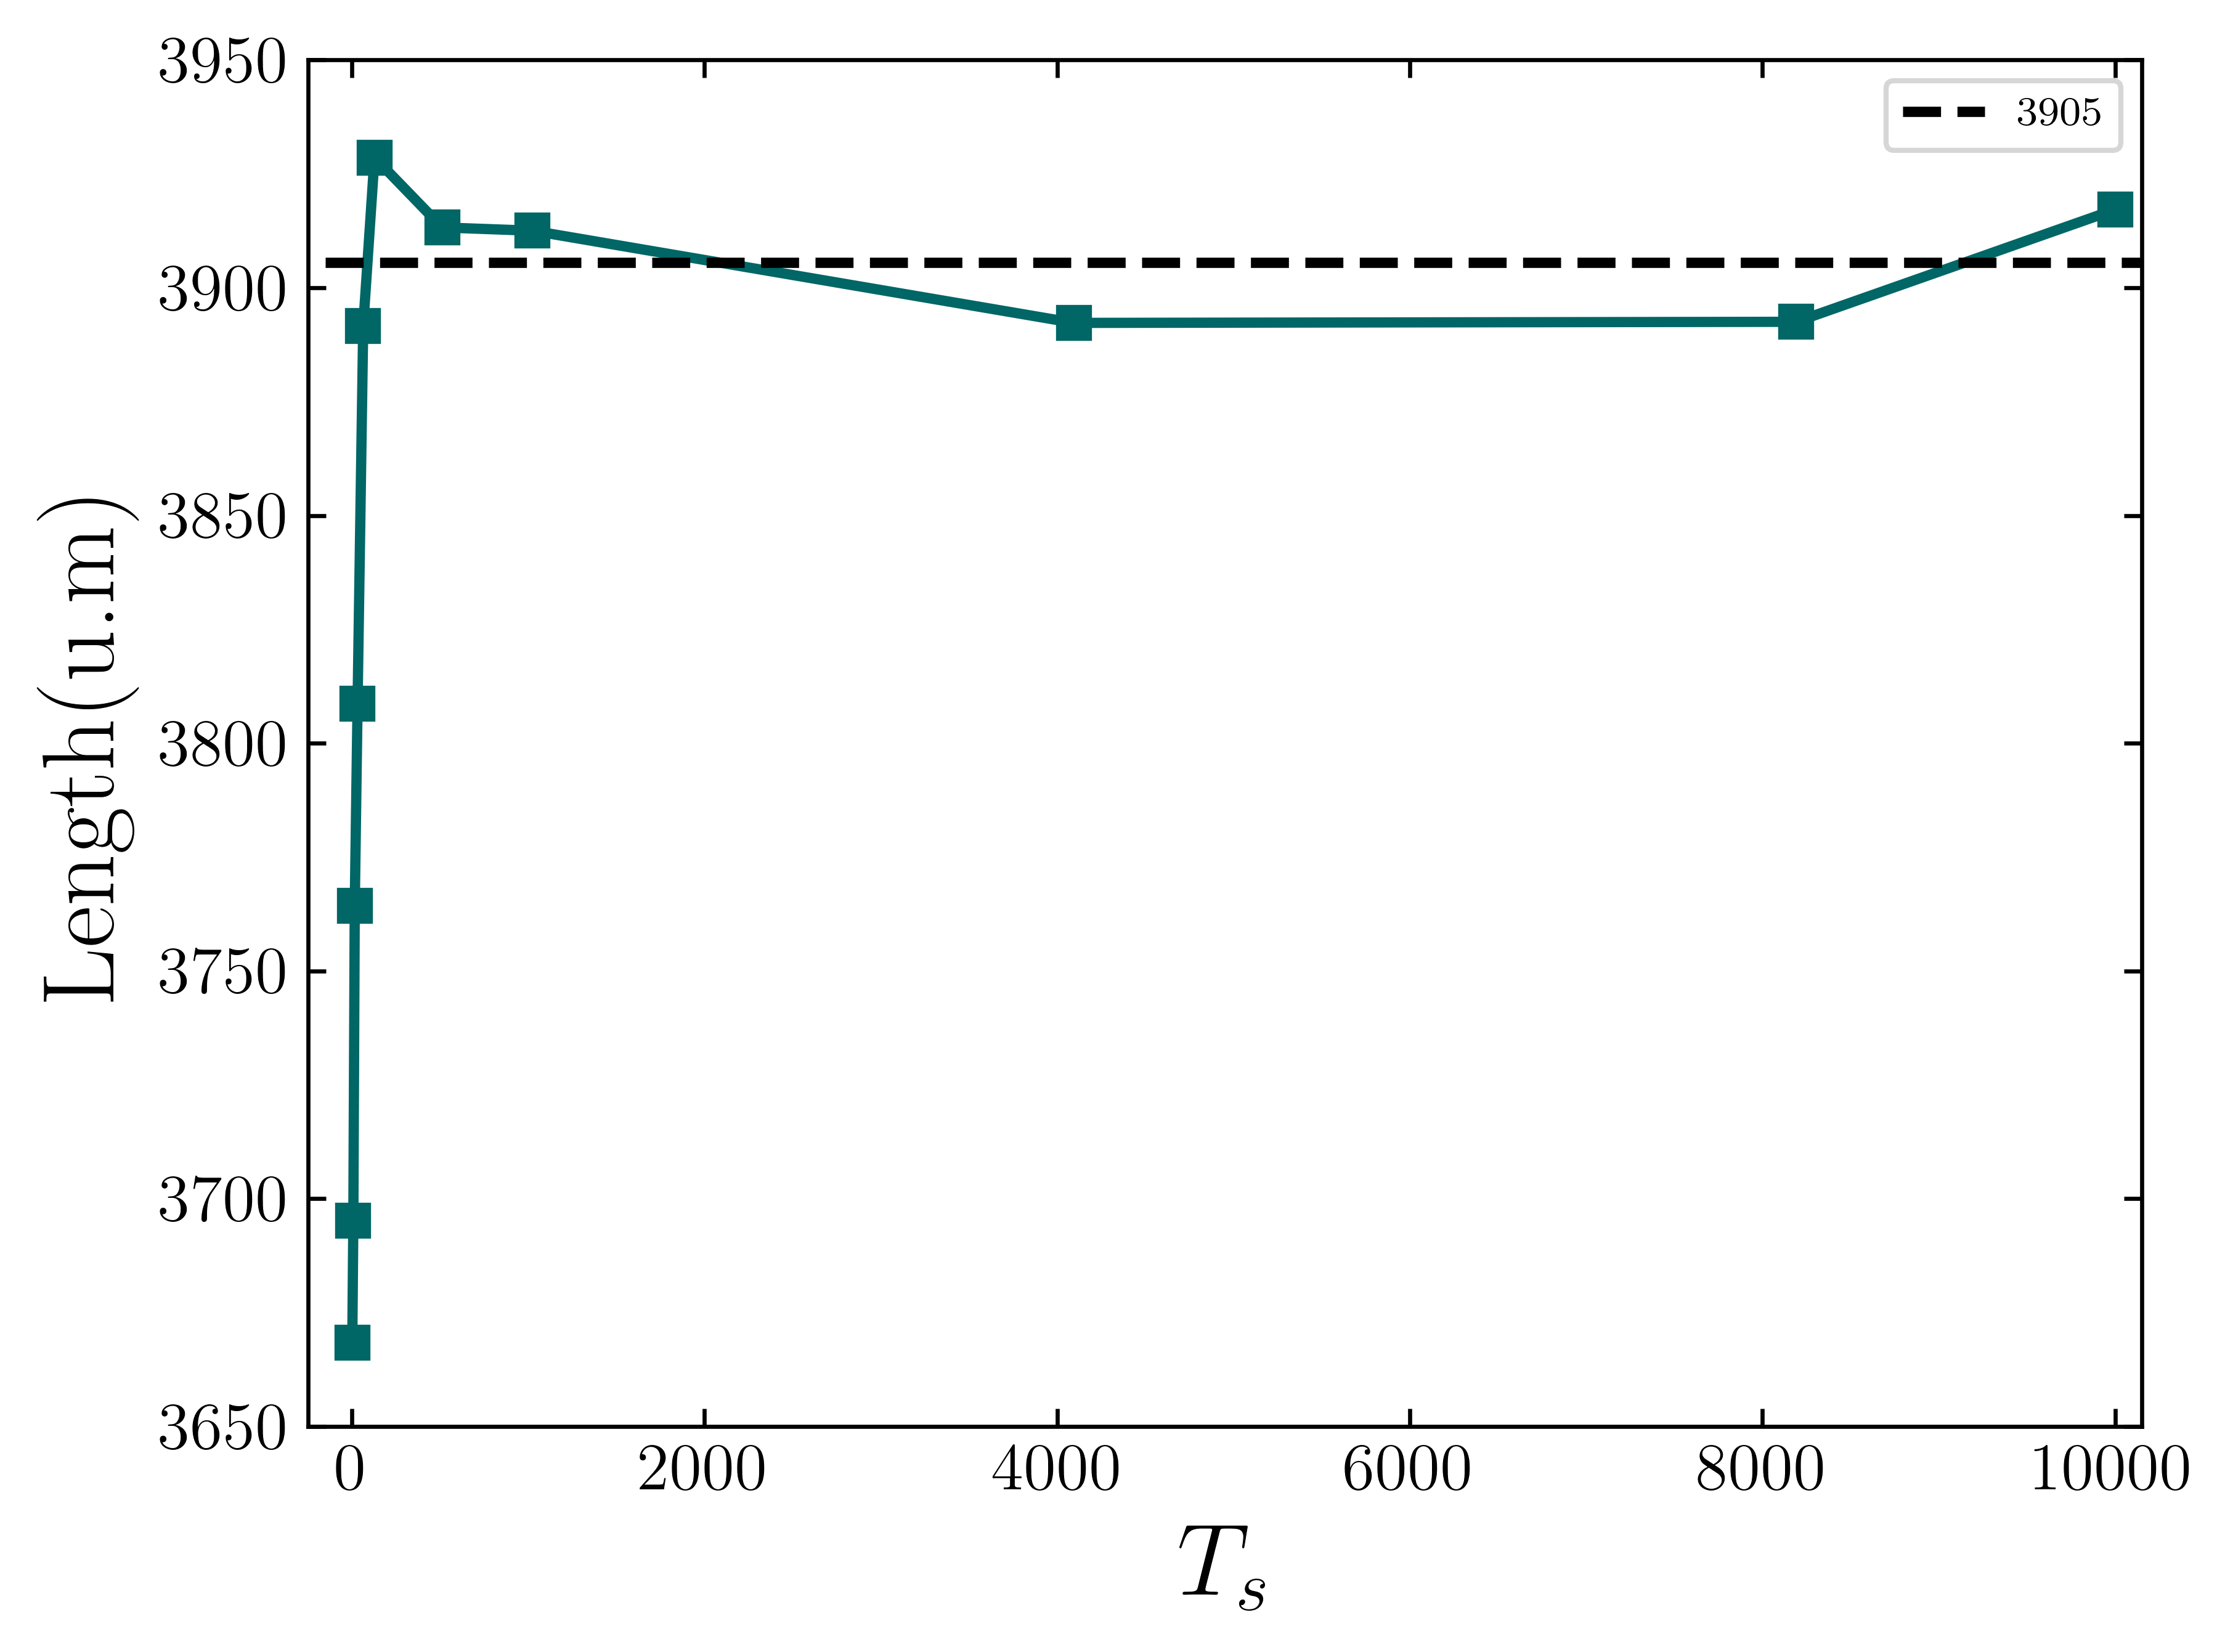

In [10]:
plt.figure(dpi = 600)
plt.plot(x,y,'s-', color = '#006666')
plt.plot(x1,y1,'--k', label = f'{int(y1[0])}')
plt.tick_params(direction='in', top=True, right=True, labeltop=False, labelright=False)
plt.xlabel(r'$T_{s}$')
plt.ylabel(r"Length(u.m)")
plt.legend()
plt.xlim(-250,10150)
plt.ylim(3650,3950)

In [13]:
y

array([3668.36      , 3695.16      , 3764.26530612, 3808.68      ,
       3891.56      , 3928.6       , 3913.24      , 3912.52      ,
       3892.28      , 3892.52      , 3917.16      ])

In [6]:
x = np.array(ts)
y = np.array(ml)

Text(0, 0.5, '$L$')

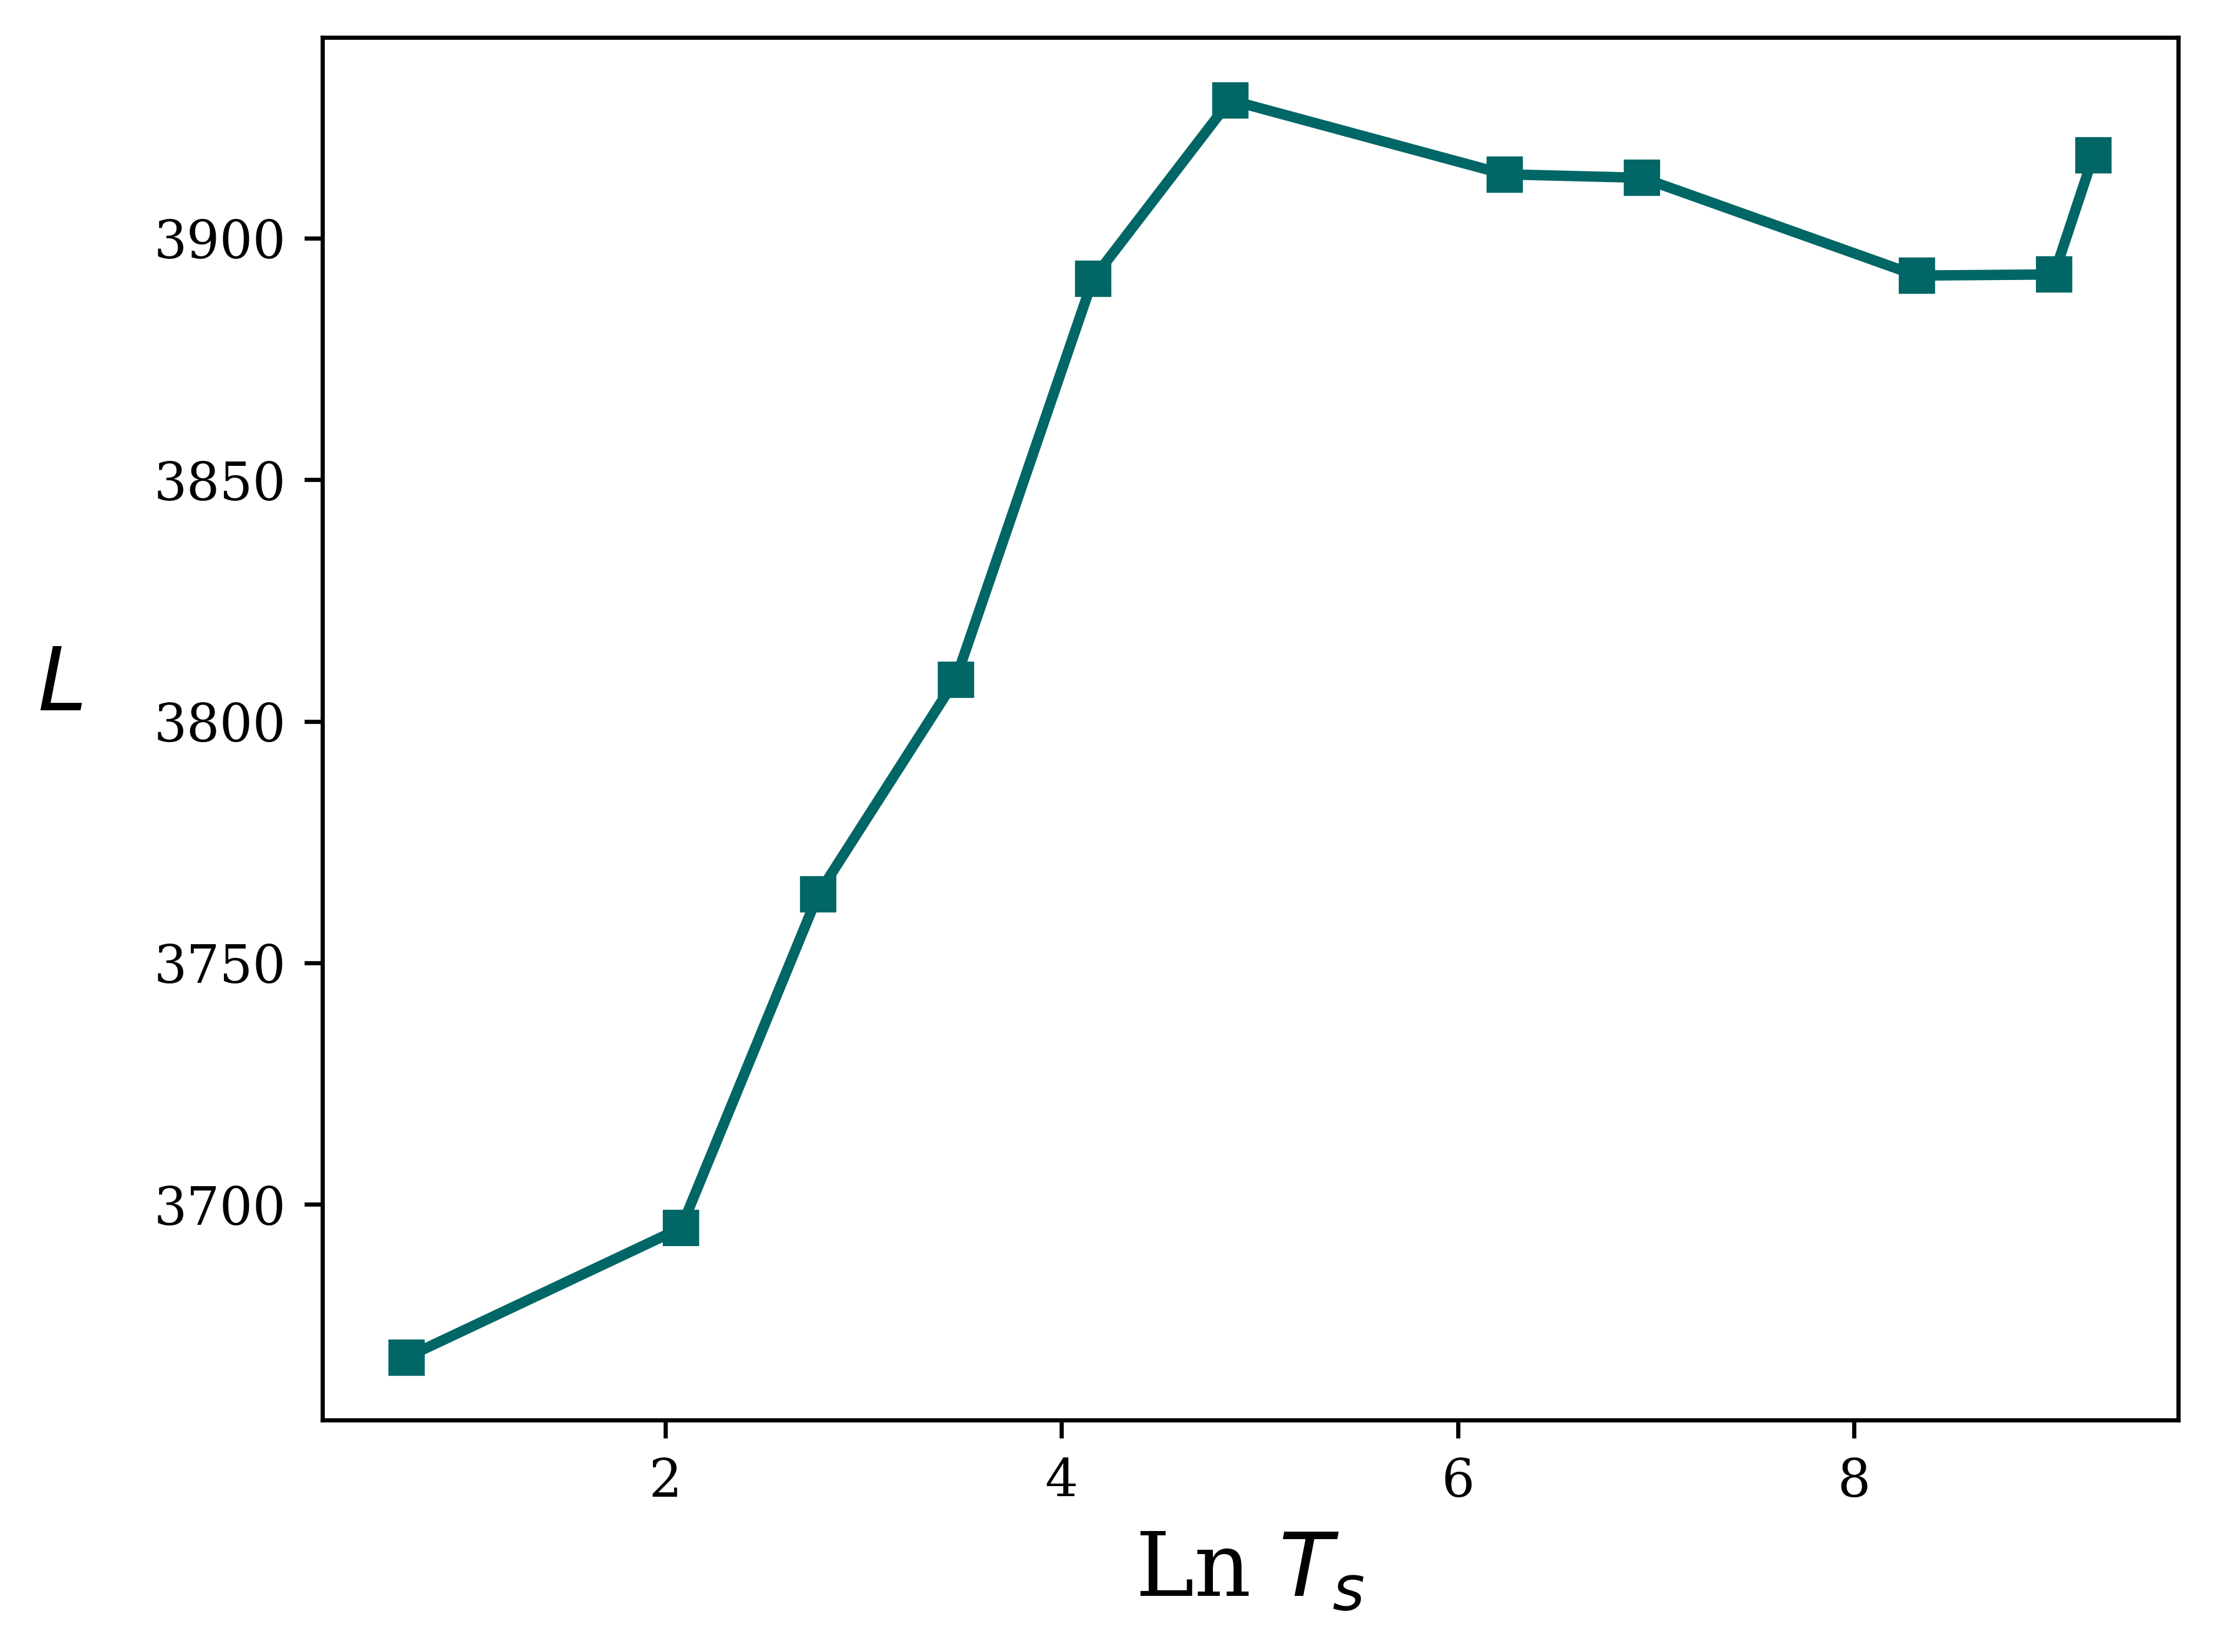

In [9]:
plt.figure(dpi = 600)
plt.plot(np.log(x),(y), 's-', color = '#006666')
plt.xlabel(r'Ln $T_{s}$')
plt.ylabel(r'$L$', rotation = 0,labelpad=18)